Auto Encoder Model

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop,Adam
from keras.datasets import mnist
from keras.utils import np_utils
# from keras import initializations
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt



Encoder of the auto encoder model

In [32]:
# The encoding process
input_img = Input(shape=(28,28,1))  

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

Decoder of the auto-encoder model

In [33]:

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Model Declare, Compile and Fiting

In [37]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), 28,28,1))
X_test = X_test.reshape((len(X_test),28,28,1 ))
print(X_train.shape)
print(X_test.shape)



# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test)
               )

X_train original shape: (60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1397 - val_loss: 0.1336
Epoch 2/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1330 - val_loss: 0.1319
Epoch 3/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1282 - val_loss: 0.1262
Epoch 4/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1249 - val_loss: 0.1236
Epoch 5/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1222 - val_loss: 0.1216


See the Auto Encoder Model Performance with test set

[[[9.10169038e-05]
  [6.72654039e-08]
  [1.25918742e-08]
  [7.63135866e-09]
  [2.95734868e-08]
  [2.15928395e-07]
  [3.25264955e-06]
  [1.86747711e-05]
  [6.31555740e-05]
  [3.35872173e-04]
  [1.15561485e-03]
  [1.31016970e-03]
  [1.07559562e-03]
  [7.68095255e-04]
  [2.98678875e-04]
  [6.19241691e-05]
  [3.54913172e-05]
  [8.10389702e-06]
  [7.96312690e-07]
  [2.34891530e-07]
  [2.98683780e-08]
  [2.06425388e-09]
  [7.80540133e-10]
  [1.00852893e-09]
  [2.57567812e-09]
  [1.19637287e-08]
  [3.45515723e-08]
  [1.13968170e-07]]

 [[6.41317399e-08]
  [4.08364401e-12]
  [4.17439520e-13]
  [1.59686153e-12]
  [1.90089472e-11]
  [8.67615535e-10]
  [3.43129791e-08]
  [1.03332070e-06]
  [1.36886038e-05]
  [1.64091587e-04]
  [1.02931261e-03]
  [8.35388899e-04]
  [4.35382128e-04]
  [1.90615654e-04]
  [6.71341259e-05]
  [3.82628377e-06]
  [8.40978373e-07]
  [1.40784394e-07]
  [8.36197511e-09]
  [4.84191021e-10]
  [2.61949715e-11]
  [5.24182043e-13]
  [4.78054621e-14]
  [2.37248067e-14]
  [6.92936

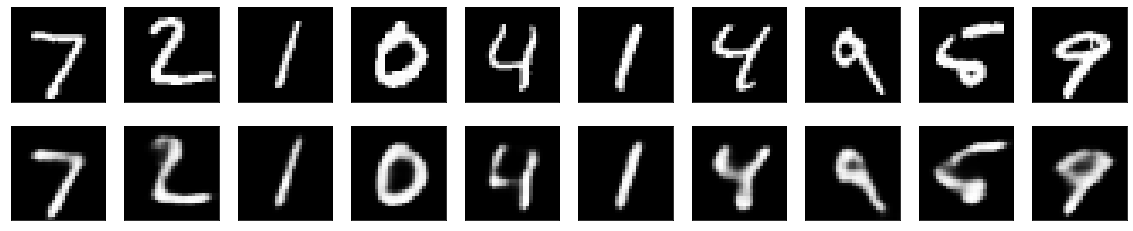

In [38]:
decoded_imgs = autoencoder.predict(X_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Add Noise to the MNIST Image set as per the instructions 

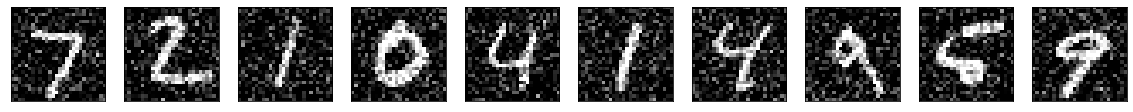

In [40]:
noise_factor=0.25 

#Add Noise to the data set
X_train_noisy= X_train + noise_factor *np.random.normal(loc=0.0 , scale =1.0 ,size=X_train.shape)
X_test_noisy= X_test + noise_factor *np.random.normal(loc=0.0 , scale =1.0 ,size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy =np.clip(X_test_noisy,0.,1.)

# Print the noise Added Images
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Fit the Auto Encoder with the noisy Images

In [42]:
autoencoder.fit(X_train_noisy, X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test)
               )





Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1279 - val_loss: 0.1247
Epoch 2/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1249 - val_loss: 0.1198
Epoch 3/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1231 - val_loss: 0.1219
Epoch 4/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1217 - val_loss: 0.1176
Epoch 5/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1203 - val_loss: 0.1187
Epoch 6/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1192 - val_loss: 0.1189
Epoch 7/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1179 - val_loss: 0.1194
Epoch 8/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1175 - val_loss: 0.1143
Epoch 9/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1166 - val_loss: 0.1150
Epoch

Inspect the accuracy of first 10 images with the auto encoder model

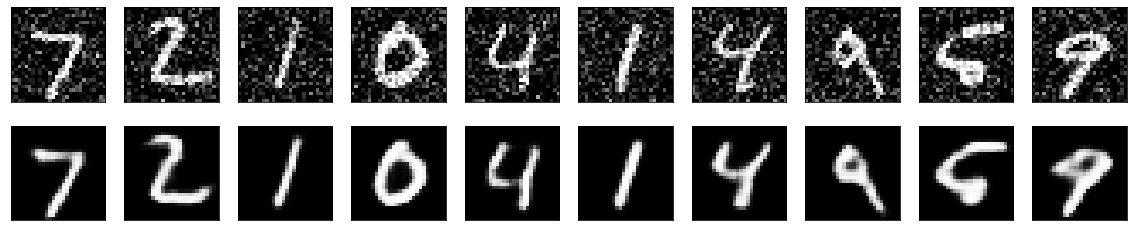

In [45]:

decoded_imgs = autoencoder.predict(X_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Normal Keras Model

In [48]:

batch_size = 128
nb_classes = 10
nb_epoch = 10
noise_factor=0.50

img_rows, img_cols = 28, 28         # input image dimensions
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.2                # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer


# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

# Add Noise to the data set
X_train_noisy= X_train + noise_factor *np.random.normal(loc=0.0 , scale =1.0 ,size=X_train.shape)
X_test_noisy= X_test + noise_factor *np.random.normal(loc=0.0 , scale =1.0 ,size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy =np.clip(X_test_noisy,0.,1.)


X_train_noisy = X_train_noisy.reshape(X_train_noisy.shape[0], img_rows, img_cols, 1)
X_test_noisy = X_test_noisy.reshape(X_test_noisy.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train_Original= autoencoder.predict(X_train_noisy)
X_test_original =autoencoder.predict(X_test_noisy)

X_train_Original = X_train_Original.astype('float32') / 255.
X_test_original = X_test_original.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_noisy.shape)
print(X_train_Original.shape[0], 'train samples')
print(X_test_original.shape[0], 'test samples')

"""
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
"""


# Convolutional model
model = Sequential()

# conv1 layer
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=input_shape, padding="same"))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Convolution2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), border_mode='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))


# fc1 layer
model.add(Dense(625, activation='relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(10, activation='softmax'))

opt = RMSprop(lr=0.001, rho=0.9)
# opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# categorical_crossentropy
# Train
history = model.fit(X_train_Original, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1)

# Evaluate
evaluation = model.evaluate(X_test_original, Y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.5f, Accuracy: %.5f' % (evaluation[0], evaluation[1]))

X_train original shape: (60000, 28, 28)
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 1.3336 - accuracy: 0.5191
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.4786 - accuracy: 0.8413
Epoch 3/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.3725 - accuracy: 0.8787
Epoch 4/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3304 - accuracy: 0.8934
Epoch 5/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.3026 - accuracy: 0.9016
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2831 - accuracy: 0.9080
Epoch 7/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2707 - accuracy: 0.9138
Epoch 8/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2646 - accuracy: 0.9140
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2556 - accuracy: 0.9174
Epoch 10/10
10000/10000 [=====================